**Assignment 10 CC By Yash Singhal(102316047)**

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords).


In [62]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

paragraph = """Artificial Intelligence is transforming the world of technology rapidly. It powers innovations like self-driving cars, recommendation systems, and smart assistants. The core of AI involves machine learning, which allows systems to learn from data. AI is widely used in healthcare, finance, and entertainment. As AI evolves, ethical concerns and regulations are becoming increasingly important."""

# 1. Lowercase and remove punctuation
text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())
print("Cleaned Text:", text_clean)

# 2. Tokenize sentences and words
sent_tokens = sent_tokenize(paragraph)
word_tokens_nltk = word_tokenize(text_clean)
word_tokens_split = text_clean.split()

# 3. Compare split() vs word_tokenize()
print("Split():", word_tokens_split)
print("word_tokenize():", word_tokens_nltk)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens_nltk if word not in stop_words]
print("Filtered Words:", filtered_words)

# 5. Word Frequency Distribution
freq_dist = Counter(filtered_words)
print("Word Frequency:", freq_dist)


Cleaned Text: artificial intelligence is transforming the world of technology rapidly it powers innovations like selfdriving cars recommendation systems and smart assistants the core of ai involves machine learning which allows systems to learn from data ai is widely used in healthcare finance and entertainment as ai evolves ethical concerns and regulations are becoming increasingly important
Split(): ['artificial', 'intelligence', 'is', 'transforming', 'the', 'world', 'of', 'technology', 'rapidly', 'it', 'powers', 'innovations', 'like', 'selfdriving', 'cars', 'recommendation', 'systems', 'and', 'smart', 'assistants', 'the', 'core', 'of', 'ai', 'involves', 'machine', 'learning', 'which', 'allows', 'systems', 'to', 'learn', 'from', 'data', 'ai', 'is', 'widely', 'used', 'in', 'healthcare', 'finance', 'and', 'entertainment', 'as', 'ai', 'evolves', 'ethical', 'concerns', 'and', 'regulations', 'are', 'becoming', 'increasingly', 'important']
word_tokenize(): ['artificial', 'intelligence', 'i

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other. 

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# 1. Extract alphabet-only words
words_alpha = re.findall(r'\b[a-zA-Z]+\b', text_clean)

# 2. Remove stopwords again
filtered_alpha = [word for word in words_alpha if word not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha]

# 5. Comparison
print("Stemmed:", stemmed_words)
print("Lemmatized:", lemmatized_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stemmed: ['artifici', 'intellig', 'transform', 'world', 'technolog', 'rapidli', 'power', 'innov', 'like', 'selfdriv', 'car', 'recommend', 'system', 'smart', 'assist', 'core', 'ai', 'involv', 'machin', 'learn', 'allow', 'system', 'learn', 'data', 'ai', 'wide', 'use', 'healthcar', 'financ', 'entertain', 'ai', 'evolv', 'ethic', 'concern', 'regul', 'becom', 'increasingli', 'import']
Lemmatized: ['artificial', 'intelligence', 'transforming', 'world', 'technology', 'rapidly', 'power', 'innovation', 'like', 'selfdriving', 'car', 'recommendation', 'system', 'smart', 'assistant', 'core', 'ai', 'involves', 'machine', 'learning', 'allows', 'system', 'learn', 'data', 'ai', 'widely', 'used', 'healthcare', 'finance', 'entertainment', 'ai', 'evolves', 'ethical', 'concern', 'regulation', 'becoming', 'increasingly', 'important']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF. 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Apple unveils new iPhone with better battery life.",
    "Samsung's latest phone has a powerful camera.",
    "OnePlus phone offers great performance at lower cost."
]

# 1. Bag of Words
cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("BoW Features:\n", cv.get_feature_names_out())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

# 3. Top 3 keywords
import numpy as np

for i, text in enumerate(texts):
    scores = tfidf_matrix[i].toarray().flatten()
    top_indices = np.argsort(scores)[-3:][::-1]
    top_words = [tfidf.get_feature_names_out()[j] for j in top_indices]
    print(f"Text {i+1} Top Keywords: {top_words}")


BoW Features:
 ['apple' 'at' 'battery' 'better' 'camera' 'cost' 'great' 'has' 'iphone'
 'latest' 'life' 'lower' 'new' 'offers' 'oneplus' 'performance' 'phone'
 'powerful' 'samsung' 'unveils' 'with']
Text 1 Top Keywords: ['with', 'unveils', 'iphone']
Text 2 Top Keywords: ['samsung', 'powerful', 'camera']
Text 3 Top Keywords: ['cost', 'lower', 'offers']


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives beƩer insights in your case.


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = "Artificial Intelligence is changing the future of human interaction."
text2 = "Blockchain ensures secure transactions and decentralized storage."

# 1. Preprocess
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return set(word_tokenize(text))

set1, set2 = preprocess(text1), preprocess(text2)

# 2a. Jaccard Similarity
jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)

# 2b. Cosine Similarity
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform([text1, text2])
cosine = cosine_similarity(tfidf_vectors[0], tfidf_vectors[1])[0][0]
print("Cosine Similarity:", cosine)


Jaccard Similarity: 0.0
Cosine Similarity: 0.0


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.


Polarity: 1.0
Subjectivity: 1.0
Sentiment: Positive


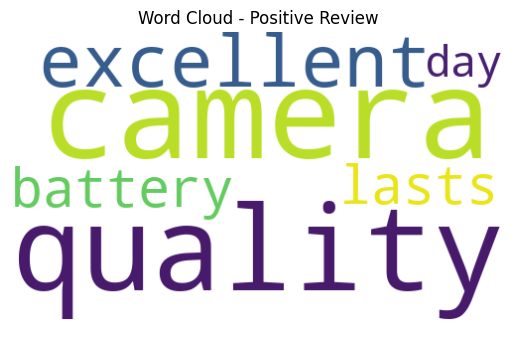

In [30]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "The camera quality is excellent, and battery lasts all day."

# 1. Sentiment
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

# 2. Classification
if blob.sentiment.polarity > 0.1:
    sentiment = "Positive"
elif blob.sentiment.polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print("Sentiment:", sentiment)

# 3. WordCloud (for positive reviews)
if sentiment == "Positive":
    wc = WordCloud(width=500, height=300, background_color='white').generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Review")
    plt.show()


Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Sample text data
text = """Artificial Intelligence is a fascinating field. It is growing rapidly. 
AI helps automate tasks and improve productivity. 
Deep learning and neural networks are key aspects. 
It is used in various industries."""

# 1. Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# 2. Creating n-gram sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram_sequence = words[:i+1]
    sequence = tokenizer.texts_to_sequences([' '.join(n_gram_sequence)])[0]
    input_sequences.append(sequence)

# Padding sequence
max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# 3. Model definition
model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_len - 1),
    LSTM(50),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

# 4. Generate new text
seed = "ai"
for _ in range(5):
    token_seq = tokenizer.texts_to_sequences([seed])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len - 1, padding='pre')
    predicted_probs = model.predict(token_seq, verbose=0)
    predicted_index = np.argmax(predicted_probs)
    next_word = tokenizer.index_word.get(predicted_index, '')
    seed += " " + next_word

print("Generated Text:", seed)


Generated Text: ai is is is is is